# Modelado Predictivo de la Edad del Cangrejo 🦀

En este proyecto, se implementarán y evaluarán diferentes algoritmos de regresión para identificar el modelo que mejor se ajuste a los datos. Debido a la naturaleza de las variables numéricas presentes, se priorizarán métodos que puedan capturar tanto relaciones lineales como no lineales entre las características del cangrejo y su edad.

## Objetivos del modelado
1. Probar múltiples algoritmos de regresión para encontrar el modelo más eficiente y preciso.
2.	Comparar el desempeño de los modelos utilizando métricas específicas que reflejen su capacidad predictiva.
3.	Seleccionar el modelo óptimo con base en las métricas y su capacidad de generalización al conjunto de prueba.

## Métricas de Evaluación

Para evaluar el desempeño de los modelos, se utilizarán las siguientes métricas:
1. Error Cuadrático Medio (Mean Squared Error - MSE)
* Penaliza grandes desviaciones entre las predicciones y los valores reales.
*	Una métrica estándar para medir la precisión del modelo en problemas de regresión.
2.	Coeficiente de Determinación ( R^2 )

   * Indica la proporción de la variabilidad explicada por el modelo.
   * Un valor cercano a 1 implica un buen ajuste, mientras que valores cercanos a 0 reflejan un ajuste deficiente.

### Load Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#feature engine
from feature_engine.encoding import OneHotEncoder
# models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib
# metrics
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
data=pd.read_csv('../data/processed/data_clear.csv')
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


---
## Preprocesado de Datos
--- 

### Train and Test set

In [4]:
np.random.seed(23)

X = data.drop(columns='Age')
y = data.Age

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=19,stratify=X['Sex'])
x_train.shape,x_test.shape

((3114, 8), (779, 8))

### One Hot encoding with Feature-Engine

In [5]:
encoder = OneHotEncoder(drop_last=True) # k_1
encoder.fit(x_train)

OneHotEncoder(drop_last=True)

In [6]:
encoder.encoder_dict_

{'Sex': ['I', 'F']}

In [7]:
# transform the data sets
x_train_encod = encoder.transform(x_train)
x_test_encod = encoder.transform(x_test)
x_test_encod.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_F
1400,1.6375,1.300,0.4500,42.297454,20.369116,10.205820,10.064072,0,0
953,1.0750,0.825,0.2375,9.071840,3.345241,1.842718,3.486988,1,0
989,1.2625,1.100,0.3500,23.459211,9.681354,5.258832,6.775531,0,0
3244,1.2500,0.950,0.3875,16.882127,6.052618,4.564269,5.669900,0,0
3597,1.2125,0.900,0.3000,14.614167,6.988152,2.905824,4.167376,1,0


### Feature Scalig with StandardScaler

In [ ]:
sc_x = StandardScaler()
x_train_sc = sc_x.fit_transform(x_train_encod)
x_test_sc = sc_x.transform(x_test_encod)

---
Nota: 
> Optional Pipeline,

In [6]:
# pipeline
pipe = Pipeline(
    [
    ('one hot',OneHotEncoder(drop_last=True)),
    ('scaler',StandardScaler())
    ]).set_output(transform="pandas")
pipe.fit(x_train)

Pipeline(steps=[('one hot', OneHotEncoder(drop_last=True)),
                ('scaler', StandardScaler())])

In [7]:
# transform the data sets
x_train_sc = pipe.transform(x_train)
x_test_sc = pipe.transform(x_test)

---
## Modelos
---

## Linear Regressor 

In [9]:
import statsmodels.api as sm

In [16]:
X_train = sm.add_constant(x_train_sc)
X_test = sm.add_constant(x_test_sc)

In [17]:
# Fit model

linreg = sm.OLS(y_train, X_train)
results = linreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     396.3
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:30:20   Log-Likelihood:                -6886.5
No. Observations:                3114   AIC:                         1.379e+04
Df Residuals:                    3104   BIC:                         1.385e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9759      0.040    251.

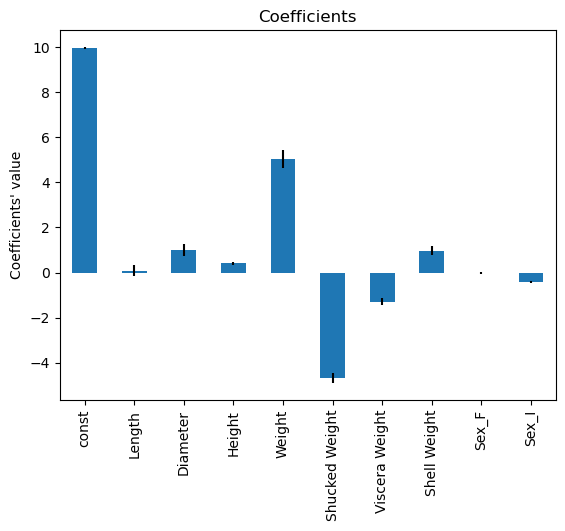

In [20]:
pd.Series(results.params, index=X_train.columns).plot.bar(
    yerr=pd.Series(results.bse))

plt.ylabel("Coefficients' value")
plt.title("Coefficients")
plt.show()

Aunque las variables Weight y Shuncked Weight están altamente correlacionadas, muestran una dirección diferente en su contribución hacia la variable objetivo, y esto se debe a la correlación.

## Modelo XGboost

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
gbm = GradientBoostingRegressor(
    criterion="friedman_mse",
    n_estimators=50,
    max_depth=3,
    random_state=3,
)
gbm.fit(x_train_sc, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=3)

In [10]:
gbm_pred = gbm.predict(x_train_sc)
r2_score(y_train, gbm_pred)

0.6028193068757952

In [11]:
# r^2  in test
gbm_pred = gbm.predict(x_test_sc)
r2_score(y_test, gbm_pred)

0.5735234799021904

> El modelo explica mas de 57 % de los datos. por ahora nuestro mejor modelo.

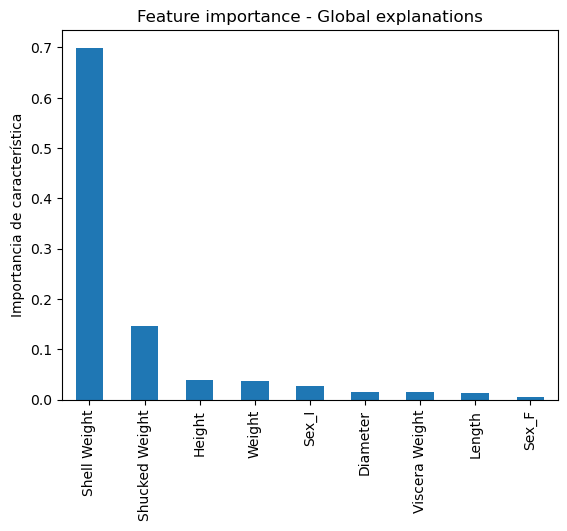

In [32]:
# gbm importance

global_exp = pd.Series(gbm.feature_importances_, index=gbm.feature_names_in_)

global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Importancia de característica")
plt.title("Feature importance - Global explanations")
plt.show()

El Peso del caparazón resulta de gran importacia para el modelo XGBOOST

In [14]:
# save model
joblib.dump(gbm, '../src/models/xgboost.pkl')

['../src/models/xgboost.pkl']

## Support Vector Regression

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_sc, y_train)

SVR()

In [ ]:
predit = regressor.predict(x_train_sc)

In [20]:
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.5513388032670781
Error Cuadratico Medio: 4.72032415523297


In [22]:
## validacion
predit=regressor.predict(x_test_sc)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5412251322781663
Error Cuadratico Medio: 4.484337768831794


- No Presentamos problemas de overfiting pero las metricas no resultan muy favorables.

In [23]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    "C": [0.1, 1, 10, 100],            # Regularización
    "kernel": ["linear", "rbf", "poly"], # Tipos de kernel
    "gamma": ["scale", "auto", 0.01, 0.1, 1],  # Solo para 'rbf' y 'poly'
    "epsilon": [0.1, 0.2, 0.5, 1.0]    # Margen de tolerancia
}
gs_svr = GridSearchCV(regressor,param_grid,scoring='r2',cv=5,n_jobs=-1)

In [1]:
# gs_svr.fit(x_train,y_train.ravel()) # lo correremos en kaggle

# Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train.ravel())

RandomForestRegressor()

In [71]:
predit=regressor.predict(x_train)
print('R_cuadrado: {}'.format(r2_score(y_train,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_train,predit))

R_cuadrado: 0.9366722840880306
Error Cuadratico Medio: 0.06245524765242376


In [72]:
predit=regressor.predict(x_test)
print('R_cuadrado: {}'.format(r2_score(y_test,predit)) + '\nError Cuadratico Medio:',mean_squared_error(y_test,predit))

R_cuadrado: 0.5390668778876895
Error Cuadratico Medio: 0.4862857925691868


- presentamos problemas de overfing, es decir predice bastante bien con los datos de entrenamiento pero no con los de validacion.

# Redes Neuronales

In [8]:

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.regularizers import L1
from tensorflow.keras.metrics import R2Score
from visualization.utils import history_curves

In [14]:
# aquitectura
modelo = Sequential()
modelo.add(Dense(32,input_dim=x_train_sc.shape[1], activation='relu'))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [15]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
## entrenamiento
history = modelo.fit(x_train_sc,y_train,epochs=50,validation_split=0.2,batch_size=20)

Epoch 1/50


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 100.9652 - r2_score: -8.8547 - val_loss: 66.0457 - val_r2_score: -5.0942
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 50.1434 - r2_score: -4.1635 - val_loss: 35.2598 - val_r2_score: -2.2535
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 29.3055 - r2_score: -2.0141 - val_loss: 26.3355 - val_r2_score: -1.4301
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9445 - r2_score: -1.1068 - val_loss: 17.7955 - val_r2_score: -0.6420
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 15.1422 - r2_score: -0.4776 - val_loss: 11.2477 - val_r2_score: -0.0379
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 9.6468 - r2_score: 0.0727 - val_loss: 7.9542 - val_r2_score: 0.2660
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 7.3360 - r2_score: 0.3242 - val_loss: 6.8700 - val_r2_score: 0.3661
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 5.9193 - r2_score: 0.4

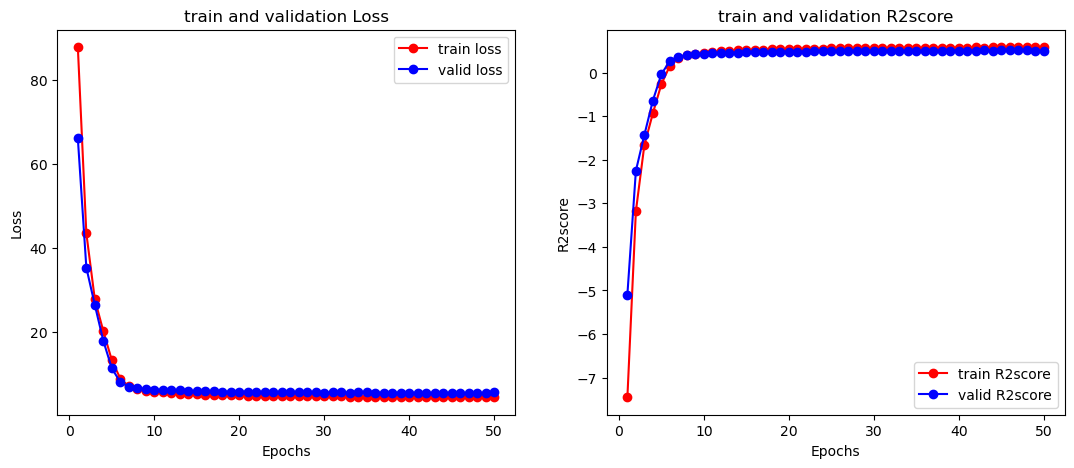

In [17]:
history_curves(history)

In [19]:
# Evaluacion del modelo
r2_score = modelo.evaluate(x_test_sc, y_test)
print("Mean Squared Error:", r2_score)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 4.2051 - r2_score: 0.5670
Mean Squared Error: [4.265807628631592, 0.5693224668502808]


In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [21]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [24]:
modelo = Sequential()
modelo.add(Dense(64,input_dim=x_train_sc.shape[1], activation='relu'))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [25]:
history = modelo.fit(x_train_sc,y_train,validation_split=0.2,batch_size=20,epochs=100,callbacks=callbacks)

Epoch 1/100


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73.8591 - r2_score: -6.3667 - val_loss: 21.2225 - val_r2_score: -0.9583 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 12.6777 - r2_score: -0.3596 - val_loss: 6.9508 - val_r2_score: 0.3586 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 5.7568 - r2_score: 0.4368 - val_loss: 6.0665 - val_r2_score: 0.4402 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 5.6962 - r2_score: 0.4428 - val_loss: 5.8614 - val_r2_score: 0.4591 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 5.1414 - r2_score: 0.5009 - val_loss: 6.0162 - val_r2_score: 0.4449 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 5.8346 - r2_score: 0.4534 - val_loss: 5.7022 - val_r2_score: 0.4738 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 5.2657 - r2_sco

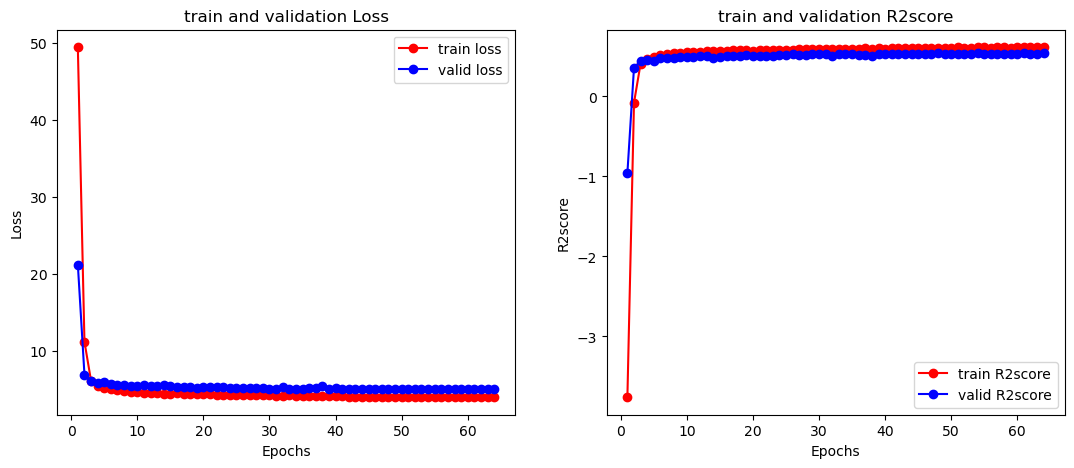

In [26]:
history_curves(history)

In [27]:
# Evaluacion del modelo
r2_score = modelo.evaluate(x_test_sc, y_test)
print("Mean Squared Error:", r2_score)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 3.8996 - r2_score: 0.5984
Mean Squared Error: [4.024584770202637, 0.5936764478683472]


In [29]:
modelo = Sequential()
modelo.add(Dense(64,input_dim=x_train_sc.shape[1], activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1,activation='linear'))
modelo.compile(optimizer='adam', loss='mean_squared_error',metrics=[R2Score()])

In [30]:
history = modelo.fit(x_train_sc,y_train,validation_split=0.2,batch_size=20,epochs=100,callbacks=callbacks)

Epoch 1/100


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 62.2624 - r2_score: -5.1055 - val_loss: 15.3849 - val_r2_score: -0.4196 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 12.4693 - r2_score: -0.1816 - val_loss: 7.1014 - val_r2_score: 0.3447 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 8.6663 - r2_score: 0.1948 - val_loss: 6.4239 - val_r2_score: 0.4072 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 8.1684 - r2_score: 0.2218 - val_loss: 6.0805 - val_r2_score: 0.4389 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 10.3595 - r2_score: -0.0036 - val_loss: 5.8737 - val_r2_score: 0.4580 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 9.1589 - r2_score: 0.0861 - val_loss: 5.7702 - val_r2_score: 0.4676 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 8.6358 - r2_s

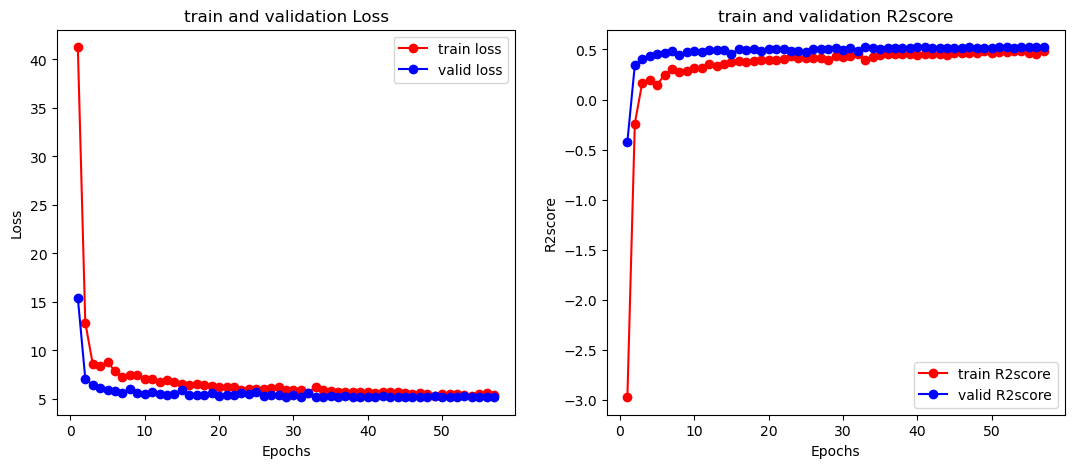

In [31]:
history_curves(history)